In [1]:
import numpy as np # linear algebra
import matplotlib.pyplot as plt
import pandas as pd
import math 
import sympy as sp



# Introduction

Differentation is part of a mathematical system referred as [calculus](https://en.wikipedia.org/wiki/Calculus_) - the study of rate of change.  Rates of change if often referred in advanced statistical methodologies, numerical analysis, and also some aspects of machine learning algorithms. Calculus forms some mathematical basis for numerous algorithms and models. Calculus often focuses on rate of changes in the learning - an example is gradient descent.  It is a tool to adjust models parameters. However, the author would not strongly encourage not to mistake calculus as an optimisation tools. Optimisation is a branch of applied mathematics, that approximate and finding solutions to a suitable level of accuracy. Optimisation and calculus have their own mathematical foundations.  

This notebook aims at exploring [to od

# A simple example - a slow introduction to the ideas of differential calculus

We use plenty of rate of change in our every day life. One example is the velocity - a fundamental concept of motion of bodies in [classical mechanics](https://www.ncl.ac.uk/webtemplate/ask-assets/external/maths-resources/mechanics/kinematics/variable-acceleration.html#:~:text=Acceleration%20is%20the%20rate%20of,acceleration%20you%20integrate%20only%20once).  Velocity combines (1) speed - distance (m) divided by time (s) - and (2) direction.  The acceleration is the rate of change in velocity.   We use the Internation system of units.

We, therefore, simulate a fictional displacement by a snail in a garden. The number have been randomly chosen by the author. We assume the snail is moving North.  We represent in a scatter plot the discrete fictitious measurements.

10
10


Text(0, 0.5, 'distance (m)')

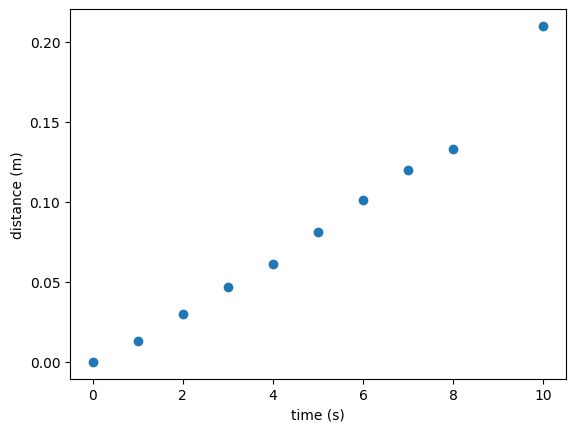

In [2]:
distances  = [0, 0.013, 0.030, 0.047, 0.061, 0.081, 0.101, 0.120, 0.133,0.210]
time_dist  = [0, 1, 2, 3, 4, 5, 6, 7, 8,10]
print(len(time_dist))
print(len(distances))
plt.scatter(time_dist, distances)
plt.xlabel("time (s)")
plt.ylabel("distance (m)")

We calcuate the $\Delta distance$ and $\Delta time$, before computing the speed the snail travelled at during all our simulated observations. $\Delta distance$  is the difference between two consecutive distances and $\Delta time$ is the difference between to time measurements.  The [gradients](https://www.mathsisfun.com/gradient.html) between each distance and time measurement is computed - i.e., the speed. 



Text(0, 0.5, 'velocity (m/s) in North direction')

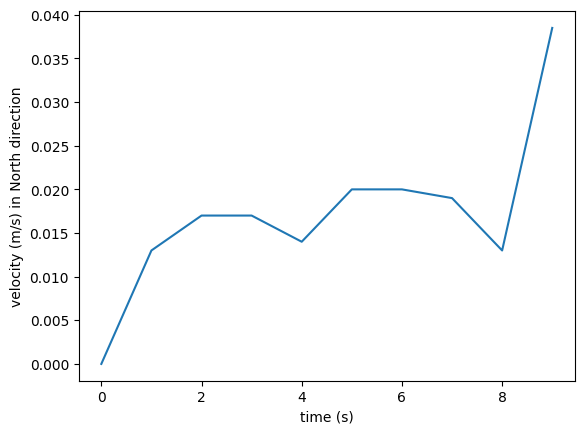

In [13]:
len_dist = len(distances)
distance_diff = [distances[i+1]-distances[i] for i in range(0, len_dist-1)]


len_time = len(time_dist)
time_diff = [time_dist[i+1]-time_dist[i] for i in range(0,len_time-1)]


velocity = [distance_diff[i]/time_diff[i] for i in range(len(time_diff))]
velocity.insert(0,0)
time_velocity = range(0, len(velocity))


plt.plot(time_velocity, velocity)
plt.xlabel("time (s)")
plt.ylabel("velocity (m/s) in North direction")


The velocity of the snail is shown in the above graph. A flat line suggests the snail move at the same velocity than the previous measurements - i.e., between 2 and 3 seconds of the fictitious experiment. An increase in velocity can be seen at the start, end and middle of the fictitious measurements. The snail travelled the most distance at those time - The line increases. A decrease in the velocity appears between 7 and 8 seconds, for example. 

We repeat those computations to compute the acceleration - the rate of change in velocity. So, if the velocity increases we accelerate, otherwise we decelerate.



Text(0, 0.5, 'acceleration (km/s^2)')

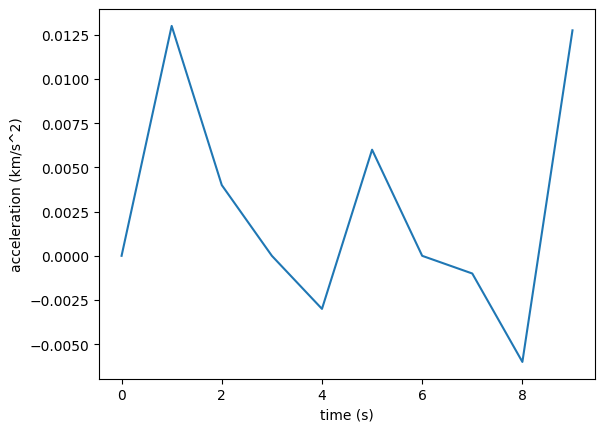

In [4]:
len_vel = len(velocity)
velocity_diff = [velocity[i+1]-velocity[i] for i in range(0, len_vel-1)]

len_time = len(time_dist)
time_diff = [time_dist[i+1]-time_dist[i] for i in range(0,len_time-1)]



acceleration = [velocity_diff[i]/time_diff[i] for i in range(len(time_diff))]
acceleration.insert(0,0)
time_acceleration = range(0, len(acceleration))

plt.plot(time_acceleration, acceleration)
plt.xlabel("time (s)")
plt.ylabel("acceleration (m/s^2)")

In [5]:
summary_table = pd.DataFrame({'time  (s)' : time_velocity, 
                              'distance (m)': distances,
                              'velocity (m/s)': velocity,
                              'acceleration  (m/s^2)' : acceleration})

summary_table

,time (s),distance (m),velocity (m/s),acceleration (m/s^2)
0,0,0.000,0.0000,0.00000
1,1,0.013,0.0130,0.01300
2,2,0.030,0.0170,0.00400
3,3,0.047,0.0170,0.00000
4,4,0.061,0.0140,-0.00300
5,5,0.081,0.0200,0.00600
6,6,0.101,0.0200,0.00000
7,7,0.120,0.0190,-0.00100
8,8,0.133,0.0130,-0.00600
9,9,0.210,0.0385,0.01275


We numerically computed the gradient between some discrete numbers. We computed some rate of change between some displacements and velocity.  We summarise our findings in a table. The latter shows when the snail accelerate and deccelerate, impacting on the velocity and the distance travelled. 

# Continuous values

We assume the height of a rocket is represented by the parabola $-5t^2 + 1000t$ - the displacement is the height. We can differentiate symbolically the displacement to find the velocity and then the acceleration.  The symbolic differentiation uses the differentiation rules to obtain the velocity and acceleration. The velocity is the first derivative is $100 -10t$ and the acceleration is the second derivative $-10$.


It is assumed the rocket decelerate, as no force is added during its flight. The physics principles are explained [here](https://evantoh23.wordpress.com/2020/04/13/displacement-time-and-velocity-time-graph-of-ball-thrown-up-and-comes-down/).

## Displacement

We numerically compute the height in metres of a rocket over 20 seconds. We discover the heighest point is 50,000 m high and the landing spot is likely to be 200 meters away. 

$d = -5t^2 +1000t$


In [16]:
time_disp    = list(range(0,201))
displacement = [-5 * math.pow(t,2) + 1000 * t for t in time_disp]
plt.plot(time_disp, displacement)
plt.xlabel("time (s)")
plt.ylabel("displacement - heigth (m)")


In [7]:
a = -5
b = 1000
c = 0

# calculate the discriminant
d = (b**2) - (4*a*c)

# find two solutions
sol1 = (-b-math.sqrt(d))/(2*a)
sol2 = (-b+math.sqrt(d))/(2*a)

print('The solutions are {0} and {1}'.format(sol1,sol2))
print('The landing spot is {0} metres away from the rocket launch position.'.format(sol1))


The solutions are 200.0 and -0.0
The landing spot is 200.0 metres away from the rocket launch position.


## Velocity
The velocity decreases once the rocket has been been launch. It does not change at the highest point - it is 0. Then the velocity becomes negative.

In [8]:
x = time_disp
dx = x[1]-x[0]
y = displacement
dydx = np.gradient(y, dx)
summary = pd.DataFrame({'time (s)': x, 
                         'displacement (m)': y, 
                         'velocity (m/s)': dydx})
summary

,time (s),displacement (m),velocity (m/s)
0,0,0.0,995.0
1,1,995.0,990.0
2,2,1980.0,980.0
3,3,2955.0,970.0
4,4,3920.0,960.0
...,...,...,...
196,196,3920.0,-960.0
197,197,2955.0,-970.0
198,198,1980.0,-980.0
199,199,995.0,-990.0


In [9]:
rows = summary['velocity (m/s)'] == 0
summary.loc[rows, :]

,time (s),displacement (m),velocity (m/s)
100,100,50000.0,0.0


Text(0, 0.5, 'velocity (m/s)')

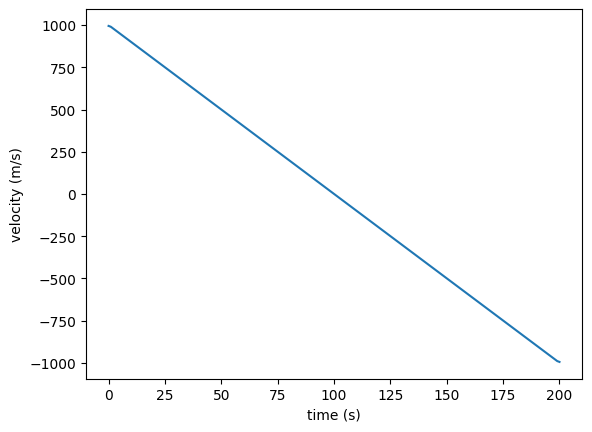

In [10]:
time_disp    = range(0,201)
velocity = dydx #[100 - 10 * t  for t in time_disp]
plt.plot(time_disp, velocity)
plt.xlabel("time (s)")
plt.ylabel("velocity (m/s)")

## Acceleration

In [11]:
x = time_velocity
dx_2 = x[1]-x[0]
y = velocity
dydx_2 = np.gradient(y, dx_2)
dydx_2
summary['acceleration'] = dydx_2
summary

,time (s),displacement (m),velocity (m/s),acceleration
0,0,0.0,995.0,-5.0
1,1,995.0,990.0,-7.5
2,2,1980.0,980.0,-10.0
3,3,2955.0,970.0,-10.0
4,4,3920.0,960.0,-10.0
...,...,...,...,...
196,196,3920.0,-960.0,-10.0
197,197,2955.0,-970.0,-10.0
198,198,1980.0,-980.0,-10.0
199,199,995.0,-990.0,-7.5


Text(0, 0.5, 'acceleration (m/s^2)')

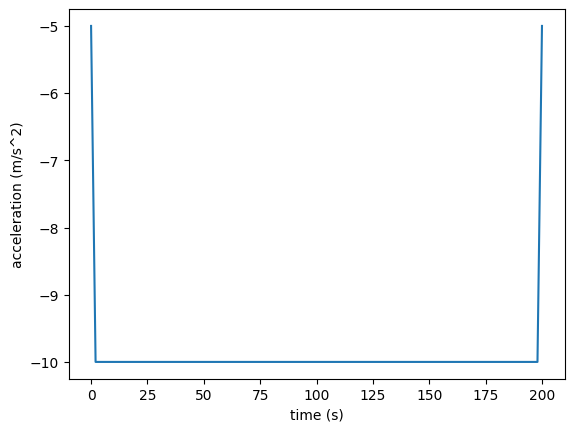

In [12]:
time_disp    = range(0,201)
acceleration = dydx_2 #[-10  for t in time_disp]
plt.plot(time_disp, acceleration)
plt.xlabel("time (s)")
plt.ylabel("acceleration (m/s^2)")

Let's explore what is happening if we explore the effect of reducing the change in time _h_, h is in seconds. 

Text(0, 0.5, 'displacement - heigth (m)')

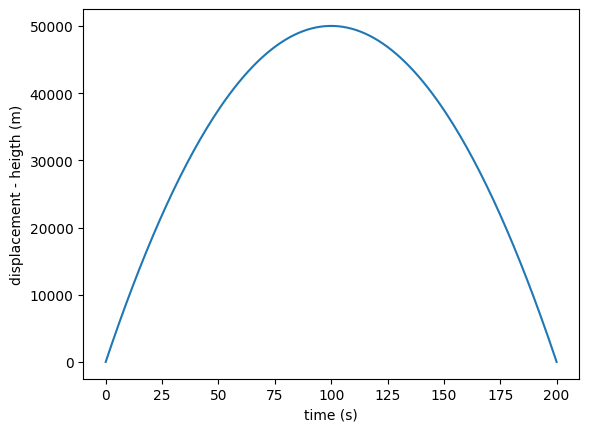

In [17]:
time_disp    = list(range(0,201))
displacement = [-5 * math.pow(t,2) + 1000 * t for t in time_disp]
plt.plot(time_disp, displacement)
plt.xlabel("time (s)")
plt.ylabel("displacement - heigth (m)")


In [15]:
h = 1
t = 50
displacement_1 = -5 * math.pow(t,2) + 1000 * (t+h) 
displacement_2 = -5 * math.pow(t+h,2) + 1000 * (t+h)
velocity = (displacement_2-displacement_1)/h
velocity


-505.0

In [30]:
h = 1e-3
t = 50
displacement_1 = (-5 * math.pow(t,2)) + (1000 * (t)) 
displacement_2 = -5 * math.pow(t+h,2) + 1000 * (t+h)
velocity = (displacement_2-displacement_1)/h
velocity


499.9950000055833

In [31]:
h = 1e-5
t = 50
displacement_1 = -5 * math.pow(t,2) + 1000 * (t) 
displacement_2 = -5 * math.pow(t+h,2) + 1000 * (t+h)
velocity = (displacement_2-displacement_1)/h
velocity


499.9999502615537

In [32]:
h = 1e-6
t = 50
displacement_1 = -5 * math.pow(t,2) + 1000 * (t) 
displacement_2 = -5 * math.pow(t+h,2) + 1000 * (t+h)
velocity = (displacement_2-displacement_1)/h
velocity


499.9999946448952

The value of h reduces the precision appears to increase. Using an algebraic version we can find exact velocity. 

$d = -5t^2 + 1000t$. 

We apply differentiate using the rules we obtain

$v = -10t + 1000$

In [29]:
t = 50
velocity = -10* t + 1000
velocity

500